In [56]:
# Customer segmentation divides a market into smaller segments of buyers who have different needs, characteristics, 
# and behaviors that require differentiated marketing mixes or strategies.

# Let's use machine learning to make customer segmentation with Python.

# The data used for this project comes from Kaggle page (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

In [57]:
# let’s import the libraries we are going to use for read and processing the data.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans

In [58]:
# Loading the dataset using pandas
df = pd.read_csv('Mall_Customers.csv')

In [59]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Tail
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83
Shape: (200, 5)


In [60]:
# We can see that the dataframe df has 200 rows and 5 columns. The columns are labeled and on the Kaggle page we can find 
# a description of each of them, which is the following:

# CustomerID: Unique ID assigned to the customer.
# Gender: Gender of the customer.
# Age: Age of the customer.
# Annual Income (k$): Annual Income of the customer.
# pending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In [61]:
# We see if there is missing data
print("Missing datab")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing datab
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Missing data in percentage
CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [62]:
# we can see that there is no data lost

# Let's know the type of data
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [63]:
# Another way is:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
# Statistical analysis of the data
# count: number of non-null data in column
# unique: number of distinct objects in the column
# top: data that is repeated the most
# freq: the number of times the most repeated data appears
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: maximum column value
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [65]:
# CustomerID column consists of unique values. I can't use it for clustering 
df = df.drop('CustomerID', axis=1)
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [66]:
# Renaming some columns
df = df.rename(index=str, columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



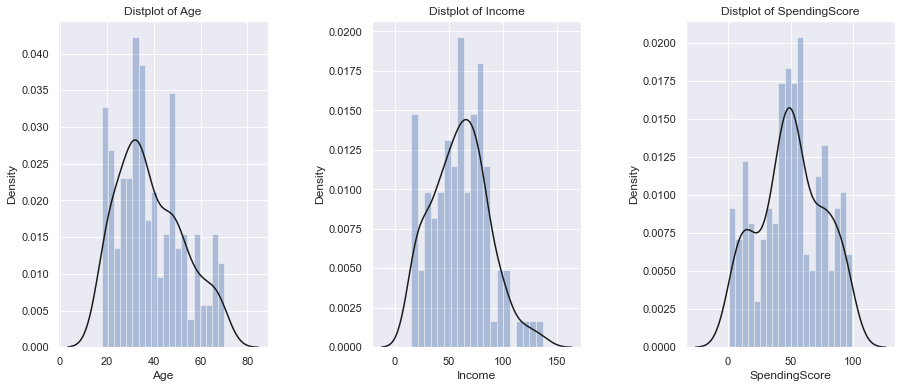

In [67]:
# Let's look at the distribution of the data.
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Income' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20, kde_kws={"color": "k"})
    plt.title('Distplot of {}'.format(x))
plt.savefig('Displot.jpg')
plt.show()

In [68]:
fig = px.pie(
    data_frame = df, 
    names = 'Gender', 
    title = 'Customer Genders', 
    hole = 0.1, 
    color_discrete_sequence = px.colors.qualitative.Set2
)
fig.write_image("Gender.jpg", engine="kaleido")
fig.show()

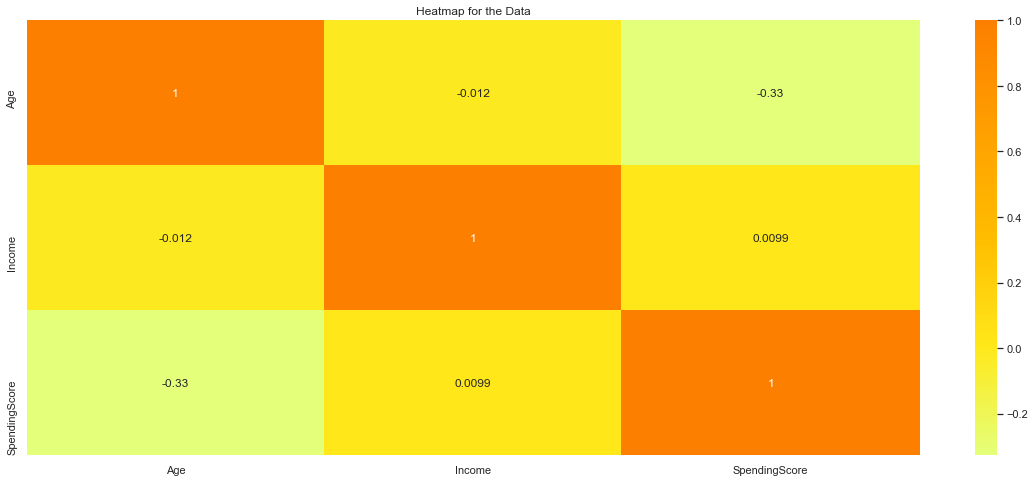

In [69]:
#visualize the correlation
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data')
plt.savefig('Correlation.jpg')
plt.show()

In [70]:
# I wanted to create a 2 dimensional cluster choosing the Annual Income Column and Spending Score column
X = df.iloc[:,[2,3]].values

In [71]:
# Finding WCSS (Within Cluster Sum of Square) value for different number of clusters
# inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

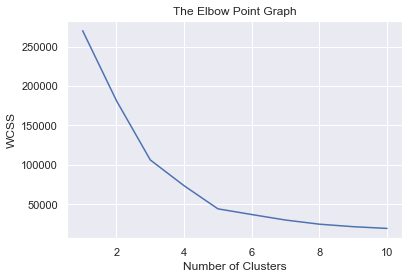

In [72]:
# Elbow graph

# Elbow method is the most preferred method. WCSS is calculated by taking the sum of the square of the distance of 
# each point from the cluster center. The Elbow Method says that the point where the amount of change in WCSS decreases,
# that is, the elbow point, is the optimum point.

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow.jpg')
plt.show()

In [73]:
# We can see that the optimum number of clusters is 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Label for each data point based on their cluster
Y = kmeans.fit_predict(X)

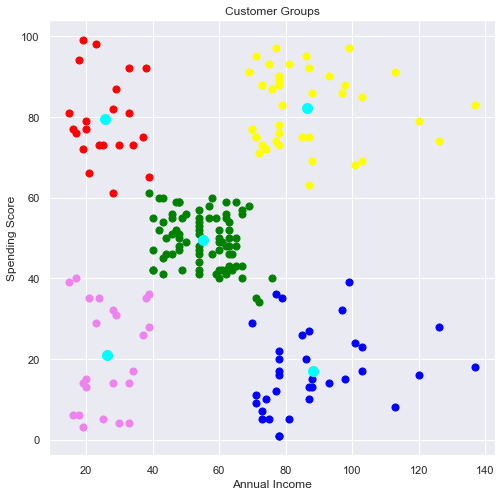

In [74]:
# Plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.savefig('Clusters.jpg')
plt.show()

In [75]:
# Cluster 1 (Blue Color) -> earning high but spending less
# Cluster 2 (Green Color) -> average in terms of earning and spending 
# Cluster 3 (Yellow Color) -> earning high and also spending high 
# Cluster 4 (Red Color) -> earning less but spending more
# Cluster 5 (Violet Color) -> Earning less , spending less